In [83]:
import pandas as pd
import numpy as np 

In [84]:
import seaborn as sns

In [85]:
data = pd.read_csv('order_reviews.csv')

In [86]:
data

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Pá...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super recomendo essa loja!",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,"Solicitei a compra de uma capa de retrovisor celta/prisma/meriva - preta - lado esquerdo, mas ch...",2017-12-15 00:00:00,2017-12-16 01:29:43


In [87]:
data = data.drop(['review_id','order_id','review_comment_title','review_creation_date','review_answer_timestamp'],axis=1)

In [88]:
coment_not_nan = data.loc[ data.review_comment_message.isna() == False]

In [89]:
pd.options.display.max_colwidth=100

In [90]:
coment_not_nan

,review_score,review_comment_message
3,5,Recebi bem antes do prazo estipulado.
4,5,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Pá...
9,4,aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta...
12,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
15,5,"Vendedor confiável, produto ok e entrega antes do prazo."
...,...,...
99983,5,Entregou dentro do prazo. O produto chegou em condições perfeitas. Estou muito satisfeita!
99990,3,"O produto não foi enviado com NF, não existe venda sem NF, com certeza fico no aguardo do envio ..."
99996,5,"Excelente mochila, entrega super rápida. Super recomendo essa loja!"
99998,1,"Solicitei a compra de uma capa de retrovisor celta/prisma/meriva - preta - lado esquerdo, mas ch..."


In [91]:
def sentiment(score):
    if (score == 5) or (score == 4):
        return 1
    if (score == 3):
        return 0
    if (score == 1) or (score == 2):
        return -1

In [92]:
coment_not_nan['sentiment'] = coment_not_nan.review_score.apply(sentiment)

<ipython-input-92-916182bbb9d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coment_not_nan['sentiment'] = coment_not_nan.review_score.apply(sentiment)


In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [94]:
email_score = 0 
def find_links(text):
    #re.sub(r'http\S+', '', text):
    if re.search(r'http\S+',text):
        return True
    else:
        return False

In [95]:
coment_not_nan.review_comment_message.apply(find_links).sum()

2

In [96]:
# Found in reviews 2 emails

/home/ruiite/.virtualenvs/ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

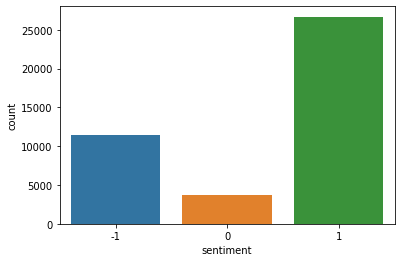

In [97]:
sns.countplot(coment_not_nan.sentiment)

In [98]:
# class disbalance

In [99]:
from nltk.corpus import stopwords

In [100]:
stopwords = stopwords.words("portuguese")

In [101]:
import re

In [192]:
regrex_pattern = re.compile(pattern = "(["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "])+", flags = re.UNICODE)

In [193]:
def remove_emojis(text):
    reduced = re.sub(regrex_pattern,'',text)
    return reduced

In [102]:
def remove_whitespaces(text):
    reduced = re.sub(r'\s',' ',text)
    return reduced

In [103]:
def remove_links(text):
    reduced = re.sub(r'http\S+', '', text)
    return reduced

In [104]:
def remove_stopwords(text):
    text = text.split()
    text = [word for word in text if word not in stopwords]
    text = " ".join(text)
    return text

In [105]:
def remove_punktuation(text):
    reduced = re.sub(r'[.,!?;-]', '',text)
    return reduced

In [194]:
def clean_text(text):
    
    text = text.lower()
    text = remove_punktuation(text)
    text = remove_links(text)
    text = remove_stopwords(text)
    text = remove_emojis(text)
    text = remove_whitespaces(text)
    
    return text

In [195]:
coment_not_nan.review_comment_message = coment_not_nan.review_comment_message.apply(clean_text)

/home/ruiite/.virtualenvs/ds/lib64/python3.9/site-packages/pandas/core/generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [109]:
coment_not_nan

,review_score,review_comment_message,sentiment
3,5,recebi bem antes prazo estipulado,1
4,5,parabéns lojas lannister adorei comprar internet seguro prático parabéns todos feliz páscoa,1
9,4,aparelho eficiente site marca aparelho impresso 3desinfector chegar outro nomeatualizar marca co...,1
12,4,pouco travandopelo valor ta boa,1
15,5,vendedor confiável produto ok entrega antes prazo,1
...,...,...,...
99983,5,entregou dentro prazo produto chegou condições perfeitas satisfeita,1
99990,3,produto enviado nf existe venda nf certeza fico aguardo envio nf podendo ser email,0
99996,5,excelente mochila entrega super rápida super recomendo loja,1
99998,1,solicitei compra capa retrovisor celta/prisma/meriva preta lado esquerdo chegou mim capa lado di...,-1


In [110]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.layers import Input,Embedding,Bidirectional,LSTM,BatchNormalization,Dense,Dropout
import keras


In [117]:
tokenizer = Tokenizer()

In [118]:
tokenizer.fit_on_texts(coment_not_nan.review_comment_message)

In [119]:
counts = tokenizer.word_counts
print(len(counts))

19419


In [120]:
counts

OrderedDict([('recebi', 5423),
             ('bem', 3110),
             ('antes', 5637),
             ('prazo', 8321),
             ('estipulado', 278),
             ('parabéns', 894),
             ('lojas', 428),
             ('lannister', 1145),
             ('adorei', 738),
             ('comprar', 923),
             ('internet', 119),
             ('seguro', 67),
             ('prático', 71),
             ('todos', 564),
             ('feliz', 141),
             ('páscoa', 2),
             ('aparelho', 126),
             ('eficiente', 158),
             ('site', 1212),
             ('marca', 150),
             ('impresso', 9),
             ('3desinfector', 1),
             ('chegar', 370),
             ('outro', 697),
             ('nomeatualizar', 1),
             ('correta', 125),
             ('vez', 451),
             ('pouco', 490),
             ('travandopelo', 1),
             ('valor', 419),
             ('ta', 54),
             ('boa', 1320),
             ('vendedor', 542)

In [126]:
text = "😡😡😡"
emoji.demojize(text, delimiters=("", "")) 

'pouting_face pouting_face'

In [123]:
import emoji

In [136]:
coment_not_nan[coment_not_nan.review_comment_message.str.contains("👏👏👏👏")]

,review_score,review_comment_message,sentiment
316,5,cada vez compro fico satisfeita parabéns honestidade clientes 👏👏👏👏,1
2756,5,gostei fiquei dúvida começo agora compro novamente recomendo produto entregue antes prazo 👏👏👏👏,1
11289,5,parabéns produto chegou tudo certo antes prazo gostei parabéns recomendo todos👏👏👏👏,1
11915,5,amo comprar nessa conceituada empresaspr recebi antes prazo estimado todos produtos excelente qu...,1
21065,5,satisfeito produto chegou bem antes prazo produto perfeitoestao parabéns recomendo site vendedor...,1
28298,4,esposo amou relógio problema primeira tentativa entrega loja targaryen resolveu td parabéns 👏👏👏👏...,1
31644,5,melhor loja👏👏👏👏😍,1
41741,4,👏👏👏👏👏,1
43453,5,😁😁😁😁😁🤗🤗🤗🤗🏇👏👏👏👏👏👏,1
48169,5,veio tudo certinho irei comprar sempre daí super recomendo 👏👏👏👏👏👏,1


In [135]:
coment_not_nan[coment_not_nan.review_comment_message.str.contains("😡😡😡")]

,review_score,review_comment_message,sentiment
546,2,comprei produto paguei boleto recebi metade produto anunciaram coisa mandaram outra insatisfeita...,-1
35201,1,achei palhaçada comprar 5 produtos receber endereço apenas 2os outros 3 q ir retirar correio gas...,-1
91325,1,😡😡😡😡😡👎👎👎👎👎 empresa compromisso cliente,-1


In [137]:
coment_not_nan[coment_not_nan.review_comment_message.str.contains("😁")]

,review_score,review_comment_message,sentiment
568,5,perfeitos😁,1
9934,5,entrega bem rápida gostei bastante produto correto 😁,1
20007,5,ótimo produto ótimas condições recomendo certeza 👍🏻😁,1
25737,5,recomendo baratheon todos valor produtos entrega rápida segurança obrigado sentido feliz 😁,1
43453,5,😁😁😁😁😁🤗🤗🤗🤗🏇👏👏👏👏👏👏,1
45688,5,dou parabéns entrega 10 dias antecedência prazo 13 entregue 3 recomendo produto funciona perfeit...,1
53964,5,👏👏👏👏👏👍😁,1
59073,5,maravilhosa experiência loja chegou bem antes data prevista ficar contente obrigada 😁👍🏻,1


In [138]:
coment_not_nan[coment_not_nan.review_comment_message.str.contains("😤")]

,review_score,review_comment_message,sentiment
632,5,parabéns 😤 excelente atendimento qualidade,1


In [139]:
text = "😤"
emoji.demojize(text, delimiters=("", "")) 

'face_with_steam_from_nose'

In [140]:
coment_not_nan[coment_not_nan.review_comment_message.str.contains("👏🏽")]

,review_score,review_comment_message,sentiment
646,5,produto perfeito entrega rápida satisfeitíssima 👏🏽,1
43572,5,atingiu expectativas 👏🏽👏🏽,1
65750,5,segunda compra q realizo neste site todos entregue dentro prazo greve caminhoneiros parabéns emp...,1
81395,5,recomendo 👏🏽👏🏽👏🏽,1
81761,5,chegou certinho q demorou bom tempinho pra chegar produto lindo qualidade super recomendo 👏🏽,1


In [142]:
text = "👏🏽"
emoji.demojize(text, delimiters=("", "")) 

'clapping_hands_medium_skin_tone'

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [169]:
corpus_of_reviews = (coment_not_nan.review_comment_message.to_list())

In [171]:
print(corpus_of_reviews)

['recebi bem antes prazo estipulado', 'parabéns lojas lannister adorei comprar internet seguro prático parabéns todos feliz páscoa', 'aparelho eficiente site marca aparelho impresso 3desinfector chegar outro nomeatualizar marca correta vez aparelho', 'pouco travandopelo valor ta boa', 'vendedor confiável produto ok entrega antes prazo', 'gostaria saber sempre recebi compra agora decpcionou', 'péssimo', 'loja nota 10', 'obrigado atençao amim dispensada', 'compra realizada facilmente entrega efetuada antes prazo dado produto começou ser usado presente problemas', 'relógio bonito barato', 'gostei comprei gato lebre', 'sempre compro internet entrega ocorre antes prazo combinado acredito ser prazo máximo stark prazo máximo esgotou ainda recebi produto', 'recebi exatamente esperava demais encomendas outros vendedores atrasaram chegou prazo', 'recomendo', 'boa', 'tô completamente apaixonada loja super responsável confiável', 'nada chegar pedido', 'bom cheiroso', 'otimo vendedor chegou ate ant

In [172]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus_of_reviews)

In [165]:
coment_not_nan.review_comment_message

pandas.core.series.Series

In [173]:
print(vectorizer.get_feature_names())


['00', '000000000000000000000000000', '000000995', '000024453', '000580', '001063', '001689', '003566', '003570', '01', '010', '0106', '011', '012', '012495', '015094', '0163750232', '0163751255', '0164784672', '0164928917', '0164929116', '0165096389', '0165465041', '0166056315', '0166646383', '0166709005', '0166821151neste', '0167207504', '0167853083', '0168695364', '0168759427', '0169244741', '01un', '02', '020118', '02012018', '020418', '021385', '02643504565', '02645364747', '02645381563', '02649450934', '026502', '02653047820', '02655871733', '02657469076', '02657530904', '02658094288', '02658697704', '02659395406', '02660166894', '02660437435', '02661329947', '02662119905', '02662562386', '02663013657', '02663388073', '02663687823', '02664287063', '02664337028', '02666377620', '02669169792', '02670489302', '02672741651mas', '02_654859320', '03', '0303', '03492551892', '0349282xxxx', '03496111588', '03496884685', '03497107955', '03497203513', '03497510804', '03497913106', '0349934

In [174]:
text = u'This is a smiley face \U0001f602'
print(text) # with emoji


This is a smiley face 😂


In [186]:
regrex_pattern = re.compile(pattern = "(["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "])+", flags = re.UNICODE)

In [196]:
coment_not_nan[coment_not_nan.review_comment_message.str.contains(regrex_pattern)]

/home/ruiite/.virtualenvs/ds/lib64/python3.9/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,review_score,review_comment_message,sentiment


In [177]:
272/42000

0.0064761904761904765

In [189]:
# less than one percent of messages contains emojis and even less contains only emojis

In [191]:
coment_not_nan[coment_not_nan.review_comment_message == regrex_pattern]

,review_score,review_comment_message,sentiment


In [199]:
coment_not_nan.review_comment_message.isna().sum()

0

In [ ]:
53964

In [210]:
coment_not_nan.iloc[]

IndexError: single positional indexer is out-of-bounds

In [202]:
coment_not_nan

,review_score,review_comment_message,sentiment
3,5,recebi bem antes prazo estipulado,1
4,5,parabéns lojas lannister adorei comprar internet seguro prático parabéns todos feliz páscoa,1
9,4,aparelho eficiente site marca aparelho impresso 3desinfector chegar outro nomeatualizar marca co...,1
12,4,pouco travandopelo valor ta boa,1
15,5,vendedor confiável produto ok entrega antes prazo,1
...,...,...,...
99983,5,entregou dentro prazo produto chegou condições perfeitas satisfeita,1
99990,3,produto enviado nf existe venda nf certeza fico aguardo envio nf podendo ser email,0
99996,5,excelente mochila entrega super rápida super recomendo loja,1
99998,1,solicitei compra capa retrovisor celta/prisma/meriva preta lado esquerdo chegou mim capa lado di...,-1


In [204]:
print(len(counts))

19419


In [205]:
total_freq = 0
rare_freq = 0
rare_counts = 0
thread=2

for key,value in counts.items():
    total_freq += value
    if value<thread:
        rare_freq += value
        rare_counts += value

print(f"{rare_counts} are used less than {thread} times")
print(f"And these words accounts for {np.round(rare_freq/total_freq*100,2)}% of whole texts")

11540 are used less than 2 times
And these words accounts for 3.79% of whole texts


In [207]:
word_size=(19419-11540)
vocab_size = word_size+1
tokenizer = Tokenizer(num_words=word_size)

tokenizer.fit_on_texts(coment_not_nan.review_comment_message)
tokenized = tokenizer.texts_to_sequences(coment_not_nan.review_comment_message)

print("\nSamples\n")
print(tokenized[0])
print(tokenized[1])
print(len(tokenized))


Samples

[6, 11, 4, 2, 170]
[44, 104, 30, 52, 40, 377, 583, 558, 44, 76, 322, 5557]
41753


In [208]:
coment_not_nan

,review_score,review_comment_message,sentiment
3,5,recebi bem antes prazo estipulado,1
4,5,parabéns lojas lannister adorei comprar internet seguro prático parabéns todos feliz páscoa,1
9,4,aparelho eficiente site marca aparelho impresso 3desinfector chegar outro nomeatualizar marca co...,1
12,4,pouco travandopelo valor ta boa,1
15,5,vendedor confiável produto ok entrega antes prazo,1
...,...,...,...
99983,5,entregou dentro prazo produto chegou condições perfeitas satisfeita,1
99990,3,produto enviado nf existe venda nf certeza fico aguardo envio nf podendo ser email,0
99996,5,excelente mochila entrega super rápida super recomendo loja,1
99998,1,solicitei compra capa retrovisor celta/prisma/meriva preta lado esquerdo chegou mim capa lado di...,-1
